NAME : VISHWAKARMA POOJA RAMASHANKAR 
SR.NO : 00-0-0-40-52-22-1-21633

Steps:
Created the 7500.csv dataset and utilized SVM and MLP classification.

In [15]:
# Importing libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from scipy import stats
from datetime import datetime
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [24]:
data_df = pd.read_csv("../data/RawLeakData/7500.csv")
print(data_df.shape)
print(data_df["Meter ID"].unique())
data_df["Date"] = pd.to_datetime(data_df["Date"], errors='coerce')
data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.hour, unit='h')
data_df['Date'] = data_df['Date'] +  pd.to_timedelta(data_df['Time'].dt.minute, unit='m')
data_df = data_df.drop(['Time'],axis=1)
data_df = data_df.set_axis(['Leak', 'Date', 'Flowrate', 'Netflow', 'Pressure', 'ID'], axis=1)
data_df.loc[(data_df["ID"] == 'SW3DM0401'), "ID"] = 1
data_df.loc[(data_df["ID"] == 'SW3DM0402'), "ID"] = 2
data_df.loc[(data_df["ID"] == 'SW3DM0702'), "ID"] = 3
data_df.loc[(data_df["ID"] == 'SW3DM0201'), "ID"] = 4
data_df.loc[(data_df["ID"] == 'SW3DM0303'), "ID"] = 5
data_df.loc[(data_df["ID"] == 'SW3DM0301'), "ID"] = 6

filtered_df1 = data_df.loc[(data_df['ID'] == 1)]
filtered_df2 = data_df.loc[(data_df['ID'] == 2)]
filtered_df3 = data_df.loc[(data_df['ID'] == 3)]
filtered_df4 = data_df.loc[(data_df['ID'] == 4)]
filtered_df5 = data_df.loc[(data_df['ID'] == 5)]
filtered_df6 = data_df.loc[(data_df['ID'] == 6)]

dta = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(filtered_df1, filtered_df2, on='Date', suffixes=("_1", "_2")),
                filtered_df3, on='Date', suffixes=("_3", "_4")
            ),
            filtered_df4, on="Date", suffixes=("_5", "_6")
        ),
        filtered_df5, on="Date", suffixes=("_7", "_8")
    ),
    filtered_df6, on="Date", suffixes=("_9", "_10")
)
# Apply z-score normalization and filtering for Flowrate columns
for i in range(1, 11):
    flowrate_column = f"Flowrate_{i}"
    if flowrate_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[flowrate_column] = pd.to_numeric(dta[flowrate_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[flowrate_column]], nan_policy='omit')) < 2).all(axis=1)]

# Apply z-score normalization and filtering for Pressure columns
for i in range(1, 11):
    pressure_column = f"Pressure_{i}"
    if pressure_column in dta.columns:
        # Convert the column to numeric type to exclude non-numeric values
        dta[pressure_column] = pd.to_numeric(dta[pressure_column], errors='coerce')
        dta = dta[(np.abs(stats.zscore(dta[[pressure_column]], nan_policy='omit')) < 2).all(axis=1)]
dta.loc[:,"LeakStatus"] = 0
dta.loc[(dta['Date'] >= '2018-03-25') & (dta['Date'] <= '2018-03-27'), "LeakStatus"] = 1
# TODO: To check with Sir
# fig, axs = plt.subplots(1, 1)
# #plt.ylim((0,20))
# plt.xticks(rotation=90)
# axs.scatter(dta["Date"],dta["Pressure_2"], marker='*', s=1)
# #axs.scatter(filtered_pdf2["Date"],filtered_pdf2["Pressure"], c='g', marker='.', s=1)
# #axs.scatter(filtered_pdf3["Date"],filtered_pdf3["Pressure"], c='r', marker='.', s=1)
# #axs.scatter(filtered_pdf4["Date"],filtered_pdf4["Pressure"], c='y', marker='.', s=1)
# axs.axvline(x = pd.Timestamp('2017-12-09'), color = 'r')
# Creating the directory if it doesn't exist
output_directory = "../data/EachLeakData"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
dta.to_csv("../data/EachLeakData/7500.csv", index=False)

(297043, 7)
['SW3DM0401' 'SW3DM0402' 'SW3DM0702' 'SW3DM0201' 'SW3DM0303' 'SW3DM0301']


/var/folders/wv/c6by5h8d0tz81wvfwp8rr4g40000gn/T/ipykernel_29787/77395604.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df["Time"] = pd.to_datetime(data_df["Time"], errors='coerce')


In [25]:
print(dta.shape)
print(dta.isna().sum())
print(dta.columns)
dta

(9097, 32)
Leak_1         0
Date           0
Flowrate_1     0
Netflow_1      0
Pressure_1     0
ID_1           0
Leak_2         0
Flowrate_2     0
Netflow_2      0
Pressure_2     0
ID_2           0
Leak_5         0
Flowrate_5     0
Netflow_5      0
Pressure_5     0
ID_5           0
Leak_6         0
Flowrate_6     0
Netflow_6      0
Pressure_6     0
ID_6           0
Leak_9         0
Flowrate_9     0
Netflow_9      0
Pressure_9     0
ID_9           0
Leak_10        0
Flowrate_10    0
Netflow_10     0
Pressure_10    0
ID_10          0
LeakStatus     0
dtype: int64
Index(['Leak_1', 'Date', 'Flowrate_1', 'Netflow_1', 'Pressure_1', 'ID_1',
       'Leak_2', 'Flowrate_2', 'Netflow_2', 'Pressure_2', 'ID_2', 'Leak_5',
       'Flowrate_5', 'Netflow_5', 'Pressure_5', 'ID_5', 'Leak_6', 'Flowrate_6',
       'Netflow_6', 'Pressure_6', 'ID_6', 'Leak_9', 'Flowrate_9', 'Netflow_9',
       'Pressure_9', 'ID_9', 'Leak_10', 'Flowrate_10', 'Netflow_10',
       'Pressure_10', 'ID_10', 'LeakStatus'],
      dt

,Leak_1,Date,Flowrate_1,Netflow_1,Pressure_1,ID_1,Leak_2,Flowrate_2,Netflow_2,Pressure_2,...,Flowrate_9,Netflow_9,Pressure_9,ID_9,Leak_10,Flowrate_10,Netflow_10,Pressure_10,ID_10,LeakStatus
0,7,2017-03-31 06:00:00,26.69,1684036.0,1.44,1,7,3.98,1103685.0,0.0,...,0.33,4605386.0,0.0,5,7,0.31,-31463.28,0.00,6,0
1,7,2017-03-31 06:15:00,26.74,1684043.0,1.44,1,7,5.00,1103686.0,0.0,...,0.28,4605386.0,0.0,5,7,0.29,-31463.63,0.00,6,0
2,7,2017-03-31 06:30:00,26.84,1684050.0,1.48,1,7,4.58,1103687.0,0.0,...,1.50,4605387.0,0.0,5,7,0.04,-31463.63,0.00,6,0
3,7,2017-03-31 06:45:00,27.26,1684057.0,1.36,1,7,3.35,1103688.0,0.0,...,0.49,4605387.0,0.0,5,7,0.00,-31463.63,0.00,6,0
4,7,2017-03-31 07:00:00,28.43,1684064.0,1.20,1,7,4.13,1103689.0,0.0,...,1.25,4605386.0,0.0,5,7,0.00,-31463.63,0.00,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16577,7,2018-04-16 23:15:00,4.14,1927126.0,0.00,1,7,3.68,1407434.0,0.0,...,0.00,5766356.0,0.0,5,7,0.00,-148847.30,0.00,6,0
16578,7,2018-04-16 23:30:00,3.48,1927127.0,0.00,1,7,3.05,1407435.0,0.0,...,0.00,5766356.0,0.0,5,7,0.00,-148847.30,0.00,6,0
16579,7,2018-04-16 23:45:00,3.72,1927128.0,0.00,1,7,4.27,1407436.0,0.0,...,0.00,5766356.0,0.0,5,7,0.00,-148847.40,1.12,6,0
16580,7,2018-04-17 00:00:00,4.21,1927129.0,0.00,1,7,3.20,1407437.0,0.0,...,0.00,5766356.0,0.0,5,7,0.00,-148867.70,7.36,6,0


In [26]:
# Selecting the features and target
X = dta[['Leak_1', 'Flowrate_1', 'Pressure_1', 'Flowrate_2', 'Pressure_2',
         'Flowrate_5', 'Pressure_5', 'Flowrate_6', 'Pressure_6',
         'Flowrate_9', 'Pressure_9', 'Flowrate_10', 'Pressure_10']]
y = dta['LeakStatus']
print(X)
print(y)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Leak_1  Flowrate_1  Pressure_1  Flowrate_2  Pressure_2  Flowrate_5  \
0           7       26.69        1.44        3.98         0.0        2.26   
1           7       26.74        1.44        5.00         0.0        4.00   
2           7       26.84        1.48        4.58         0.0        1.34   
3           7       27.26        1.36        3.35         0.0        1.57   
4           7       28.43        1.20        4.13         0.0        2.51   
...       ...         ...         ...         ...         ...         ...   
16577       7        4.14        0.00        3.68         0.0        3.11   
16578       7        3.48        0.00        3.05         0.0        2.21   
16579       7        3.72        0.00        4.27         0.0        1.47   
16580       7        4.21        0.00        3.20         0.0        0.76   
16581       7        3.81        0.00        4.08         0.0        1.70   

       Pressure_5  Flowrate_6  Pressure_6  Flowrate_9  Pressure_9  \
0     

Accuracy: 0.85
Train Accuracy: 0.8513123539920296
Test Accuracy: 0.8543956043956044
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1806
           1       0.04      0.86      0.08        14

    accuracy                           0.85      1820
   macro avg       0.52      0.86      0.50      1820
weighted avg       0.99      0.85      0.91      1820

Confusion matrix: SVM
[[1543  263]
 [   2   12]]


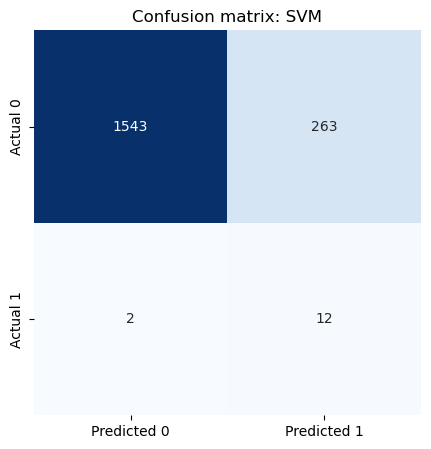

In [27]:
modelDir = '../data/EachLeakModel'
if not os.path.exists(modelDir):
    os.makedirs(modelDir)

clf = svm.SVC(C=3000000.0, kernel='rbf', class_weight='balanced')
# Training the model on the training data
clf.fit(X_train, y_train)
# Saving the trained model 
ModelName = os.path.join(modelDir, '7500.pkl')
joblib.dump(clf, ModelName)
# Making predictions on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Train Accuracy: {clf.score(X_train, y_train)}')
print(f'Test Accuracy: {clf.score(X_test, y_test)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Printing the first 25 rows of predictions and actual values
# print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1)[:25])

# Plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix: SVM')
print(conf_matrix)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion matrix: SVM')
plt.show()